In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
columns =["Gender"]

In [6]:
for col in columns:
    df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
df=df.rename(columns={"Annual Income (k$)":"income", "Spending Score (1-100)":"score"})

In [12]:
df

,CustomerID,Gender,Age,income,score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [13]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
income        0
score         0
dtype: int64

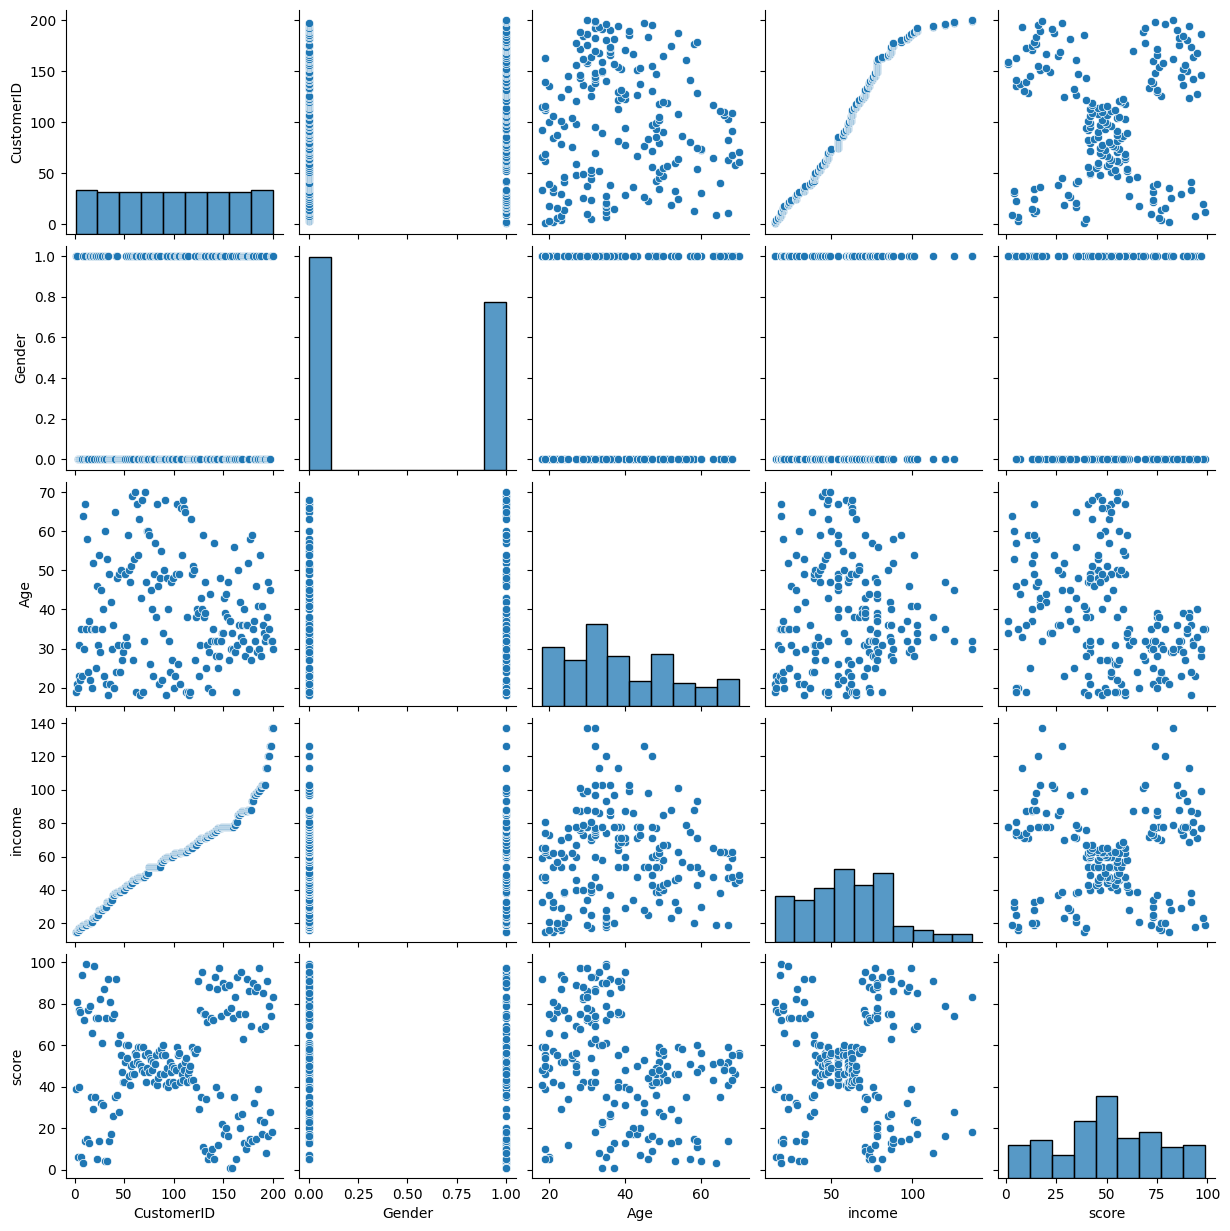

In [14]:
sns.pairplot(df)

<Axes: xlabel='income', ylabel='score'>

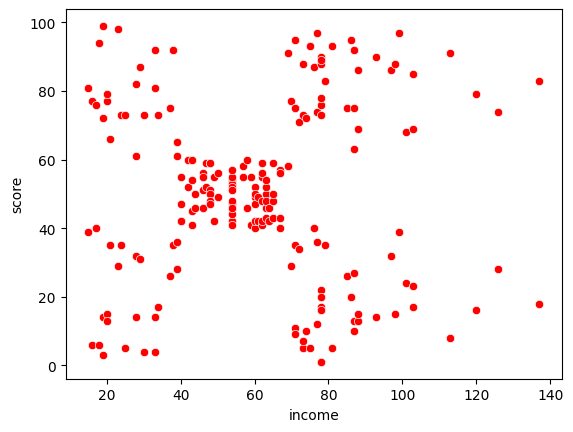

In [16]:
sns.scatterplot(x=df.income, y=df.score, color="r")

<Axes: >

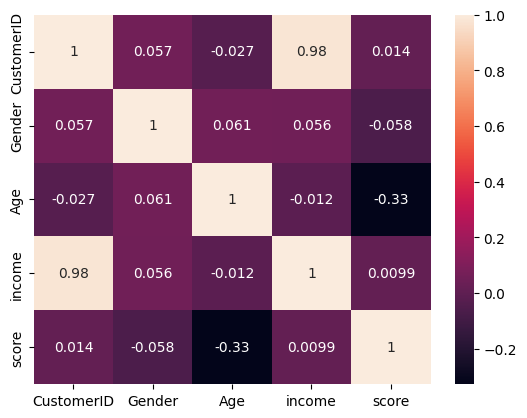

In [17]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='income', ylabel='Count'>

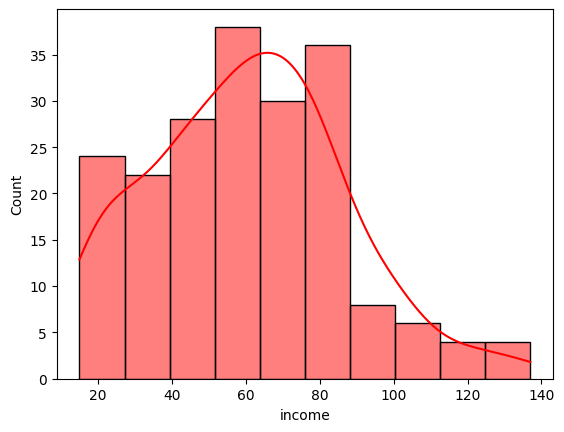

In [21]:
sns.histplot(x=df.income, color="r", kde= True)

<Axes: xlabel='score', ylabel='Count'>

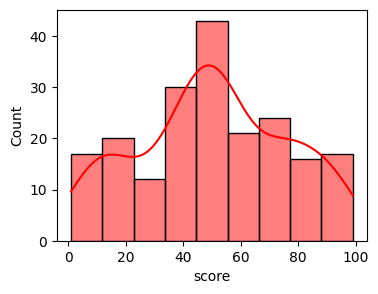

In [23]:

plt.figure(figsize=(4,3))
sns.histplot(x=df.score, color="r", kde= True)

In [24]:
kmeans=KMeans()

In [25]:
model=kmeans.fit(df[["income", "score"]])

In [26]:
model

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [28]:
pred=model.predict(df[["income", "score"]])

In [29]:
pred

array([6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 6, 0, 6, 4, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 4, 0, 4, 4,
       6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 5, 2, 5, 2, 5, 2, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7], dtype=int32)

In [30]:
df["pred_clus"]=pred

In [32]:
df.head(15)

,CustomerID,Gender,Age,income,score,pred_clus
0,1,1,19,15,39,6
1,2,1,21,15,81,0
2,3,0,20,16,6,6
3,4,0,23,16,77,0
4,5,0,31,17,40,6
5,6,0,22,17,76,0
6,7,0,35,18,6,6
7,8,0,23,18,94,0
8,9,1,64,19,3,6
9,10,0,30,19,72,0


In [35]:
cluster_1=model.cluster_centers_
cluster_1

array([[ 24.95      ,  81.        ],
       [ 61.30188679,  48.24528302],
       [ 80.375     ,  82.9375    ],
       [ 79.70833333,  14.29166667],
       [ 43.96969697,  51.12121212],
       [109.7       ,  22.        ],
       [ 25.14285714,  19.52380952],
       [114.71428571,  78.42857143]])

,CustomerID,Gender,Age,income,score,pred_clus
1,2,1,21,15,81,0
3,4,0,23,16,77,0
5,6,0,22,17,76,0
7,8,0,23,18,94,0
9,10,0,30,19,72,0
11,12,0,35,19,99,0
13,14,0,24,20,77,0
15,16,1,22,20,79,0
17,18,1,20,21,66,0
19,20,0,35,23,98,0


In [50]:
df0=df[df["pred_clus"]==0]
df1=df[df["pred_clus"]==1]
df2=df[df["pred_clus"]==2]
df3=df[df["pred_clus"]==3]
df4=df[df["pred_clus"]==4]
df5=df[df["pred_clus"]==5]
df6=df[df["pred_clus"]==6]
df7=df[df["pred_clus"]==7]


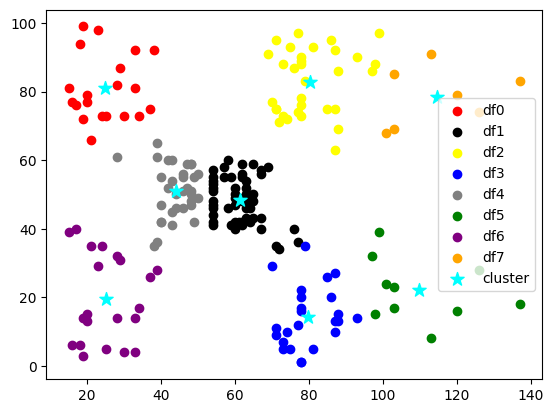

In [56]:
plt.scatter(df0.income,df0.score, color="r", label="df0")
plt.scatter(df1.income,df1.score, color="black", label="df1")
plt.scatter(df2.income,df2.score, color="yellow", label="df2")
plt.scatter(df3.income,df3.score, color="blue", label="df3")
plt.scatter(df4.income,df4.score, color="grey", label="df4")
plt.scatter(df5.income,df5.score, color="green", label="df5")
plt.scatter(df6.income,df6.score, color="purple", label="df6")
plt.scatter(df7.income,df7.score, color="orange", label="df7")
plt.scatter(cluster_1[:,0],cluster_1[:,1], color="cyan", label="cluster", marker="*", s=100)

plt.legend()

In [57]:
# Elbow method
wcss=[]
clus=range(2,15)

for k in clus:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[["income","score" ]])
    wcss.append(kmeans.inertia_)


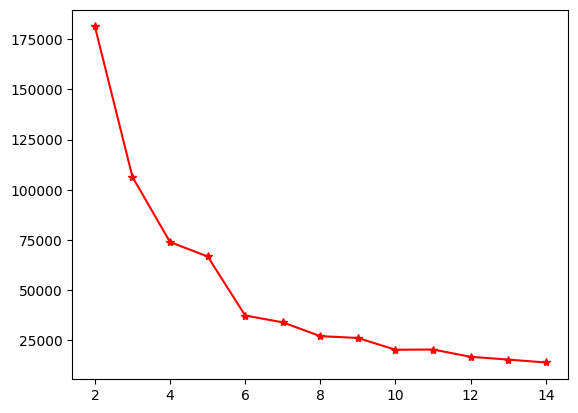

In [60]:
plt.plot(clus,wcss, color="r", marker="*" )

In [61]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from kneed import KneeLocator
kn1=KneeLocator(clus,wcss, curve="convex", direction="decreasing")

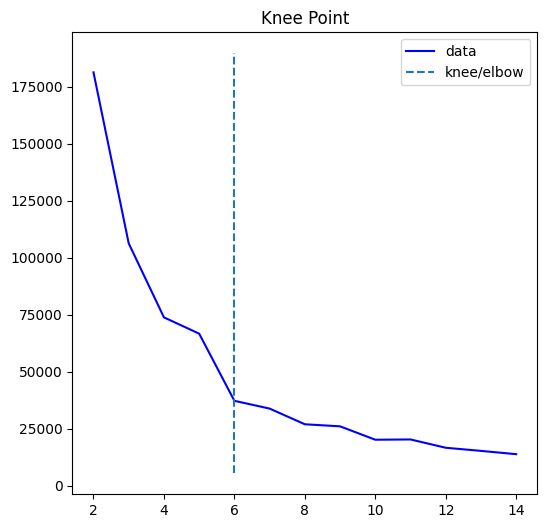

In [65]:
kn1.plot_knee()